In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv(r"C:\Users\Siddhant Sonawane\Downloads\book (1).csv",encoding='Latin1')
data

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [3]:
#information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [4]:
#describe data
data.describe()

,Unnamed: 0,User.ID,Book.Rating
count,10000.00000,10000.000000,10000.00000
mean,5000.50000,95321.249800,7.56630
std,2886.89568,117645.703609,1.82152
min,1.00000,8.000000,1.00000
25%,2500.75000,2103.000000,7.00000
50%,5000.50000,3757.000000,8.00000
75%,7500.25000,162052.000000,9.00000
max,10000.00000,278854.000000,10.00000


In [5]:
#checking null values
data.isnull().sum()

Unnamed: 0     0
User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

In [6]:
# checking duplicates
data.duplicated().sum()

0

In [7]:
#renaming columns
data.rename({'Unnamed: 0':'index','User.ID':'userid','Book.Title':'title','Book.Rating':'rating'},axis=1,inplace=True)
data.set_index('index',inplace=True)
data

,userid,title,rating
index,,,
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6
...,...,...,...
9996,162121,American Fried: Adventures of a Happy Eater.,7
9997,162121,Cannibal In Manhattan,9
9998,162121,How to Flirt: A Practical Guide,7


<AxesSubplot:>

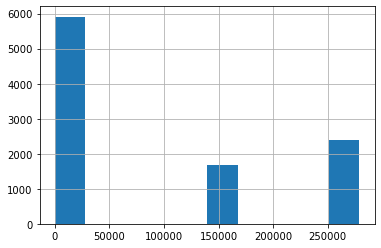

In [8]:
#Data Visualization 
data['userid'].hist()

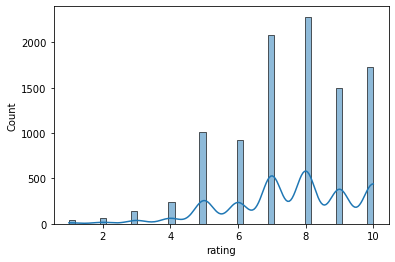

In [9]:
sns.histplot(data['rating'],kde=True);

*From the above,it is clear that highest rating given by users are 7 and 8.

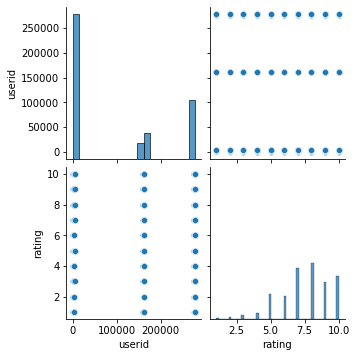

In [10]:
#pairplot of data
sns.pairplot(data)

In [11]:
# number of unique users in the data set
print('Number of unique users id:',len(data.userid.unique()))

Number of unique users id: 2182


In [12]:
# number of unique movies in the data set
print('Number of unique movies:',len(data.title.unique()))

Number of unique movies: 9659


<AxesSubplot:ylabel='rating'>

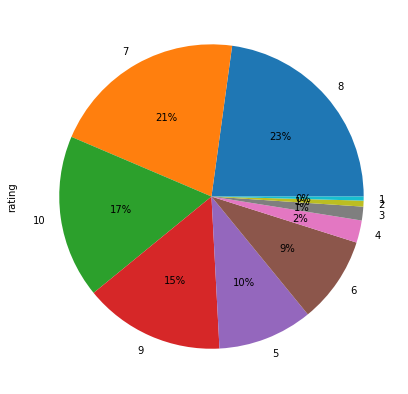

In [13]:
# visualizing ratings given by users
fig=plt.figure(figsize=(15,7))
data['rating'].value_counts()
data.rating.value_counts().plot(kind='pie',autopct='%1.0f%%')

Most of the ratings given by users are 8,7,10 and 9.

In [14]:
# top books
top_books = data['title'].value_counts().head(10)
top_books.index

Index(['Fahrenheit 451', 'Charlie and the Chocolate Factory',
       'The Subtle Knife (His Dark Materials, Book 2)', 'Vanished',
       'Ender's Game (Ender Wiggins Saga (Paperback))', 'Stardust',
       'The Amber Spyglass (His Dark Materials, Book 3)', 'Life Is Elsewhere',
       'The Golden Compass (His Dark Materials, Book 1)',
       'The Hitchhiker's Guide to the Galaxy'],
      dtype='object')

In [15]:
#creating pivot table
user_book = data.pivot_table(index='userid',columns = 'title', values = 'rating').fillna(0)
user_book

title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
userid,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [16]:
#calculating cosine similarities between users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation

In [17]:
user_sim = 1- pairwise_distances(user_book.values,metric='cosine')

In [18]:
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [19]:
# store data into dataframe
user_sm = pd.DataFrame(user_sim)
user_sm

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
# set index and coulumns of user_sm
user_sm.index = list(user_book.index)
user_sm.columns = list(user_book.index)

In [21]:
user_sm.iloc[0:5, 0:5]

,8,9,10,12,14
8,1.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0
14,0.0,0.0,0.0,0.0,1.0


In [22]:
np.fill_diagonal(user_sim,0)
user_sm.iloc[0:5, 0:5]

,8,9,10,12,14
8,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0


In [23]:
#most similar user
user_sm.idxmax(axis=1)[0:10]

8          8
9          8
10         8
12         8
14         8
16         8
17         8
19    278418
22         8
26         8
dtype: int64

In [24]:
data[(data['userid']==8) | (data['userid']==14)]

,userid,title,rating
index,,,
2400,8,Ancient Celtic Romances,5
2401,8,The Western way: A practical guide to the West...,5
2402,8,Wings,5
2403,8,Truckers,5
2404,8,Keepers of the Earth Teachers Guide,6
2405,8,The Celts Activity Book,6
2406,8,The Art Of Celtia,7
2410,14,COPS,5
2411,14,A Cold Heart: An Alex Delaware Novel,5


In [25]:
user_1 = data[(data['userid']==8)]

In [26]:
user_2 = data[(data['userid']==14)]

In [27]:
user_1

,userid,title,rating
index,,,
2400,8,Ancient Celtic Romances,5
2401,8,The Western way: A practical guide to the West...,5
2402,8,Wings,5
2403,8,Truckers,5
2404,8,Keepers of the Earth Teachers Guide,6
2405,8,The Celts Activity Book,6
2406,8,The Art Of Celtia,7


In [28]:
user_2

,userid,title,rating
index,,,
2410,14,COPS,5
2411,14,A Cold Heart: An Alex Delaware Novel,5
2412,14,Dead Sleep,6


In [29]:
#merging userid 1 & 2 
pd.merge(user_1,user_2,on='title',how='outer')

,userid_x,title,rating_x,userid_y,rating_y
0,8.0,Ancient Celtic Romances,5.0,NaN,NaN
1,8.0,The Western way: A practical guide to the West...,5.0,NaN,NaN
2,8.0,Wings,5.0,NaN,NaN
3,8.0,Truckers,5.0,NaN,NaN
4,8.0,Keepers of the Earth Teachers Guide,6.0,NaN,NaN
5,8.0,The Celts Activity Book,6.0,NaN,NaN
6,8.0,The Art Of Celtia,7.0,NaN,NaN
7,NaN,COPS,NaN,14.0,5.0
8,NaN,A Cold Heart: An Alex Delaware Novel,NaN,14.0,5.0
9,NaN,Dead Sleep,NaN,14.0,6.0


Observing above, we can recommend userid 8 'Deep Sleep' book because userid 14 have rated the most.
Also we can recommend userid 14 'The Art Of Celtia','The Celts Activity Book' and 'Keepers of the Earth Teachers Guide' books because they also have maximum rating 7 and 6 from userid 8.